## Rainfall Data analysis to explore trend, patterns and anomalies spread across countries and regions.

In [61]:
data_filename = '/users/apple/downloads/CHIRPS_5_Countries_2018_2022.csv'

#### Import all necessary libraries that could be useful in the analysis. 

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

Data Preparation and cleaning:

Load the file using pandas
Look at some information about the data and the columns.

In [63]:
import pandas as pd

In [64]:
df = pd.read_csv(data_filename, encoding='latin-1')

### Checking the data outlook and a sample of the top of data

In [65]:
df

,Country,Region,Year,Month,Rainfall_mm
0,Kenya,Nairobi,2018,1,25.41
1,Kenya,Nairobi,2018,2,214.89
2,Kenya,Nairobi,2018,3,218.55
3,Kenya,Nairobi,2018,4,256.78
4,Kenya,Nairobi,2018,5,291.81
...,...,...,...,...,...
895,Côte dIvoire,Korhogo,2022,8,349.26
896,Côte dIvoire,Korhogo,2022,9,389.53
897,Côte dIvoire,Korhogo,2022,10,387.71
898,Côte dIvoire,Korhogo,2022,11,301.11


### Defining the number of columns and their names within the dataset

In [66]:
df.columns

Index(['Country', 'Region', 'Year', 'Month', 'Rainfall_mm'], dtype='object')

### Get the number of columns in the dataset. Countable as above.

In [67]:
len(df.columns)

5

In [68]:
df.info

<bound method DataFrame.info of            Country   Region  Year  Month  Rainfall_mm
0            Kenya  Nairobi  2018      1        25.41
1            Kenya  Nairobi  2018      2       214.89
2            Kenya  Nairobi  2018      3       218.55
3            Kenya  Nairobi  2018      4       256.78
4            Kenya  Nairobi  2018      5       291.81
..             ...      ...   ...    ...          ...
895  Côte dIvoire  Korhogo  2022      8       349.26
896  Côte dIvoire  Korhogo  2022      9       389.53
897  Côte dIvoire  Korhogo  2022     10       387.71
898  Côte dIvoire  Korhogo  2022     11       301.11
899  Côte dIvoire  Korhogo  2022     12        56.38

[900 rows x 5 columns]>

###  Description of data in terms of quartiles, standard deviation, mean, count, minimum and maximum rainfall experienced.

In [69]:
df.describe()

,Year,Month,Rainfall_mm
count,900.000,900.000000,900.000000
mean,2020.000,6.500000,202.686533
std,1.415,3.453972,116.450002
min,2018.000,1.000000,6.830000
25%,2019.000,3.750000,98.985000
50%,2020.000,6.500000,205.140000
75%,2021.000,9.250000,303.547500
max,2022.000,12.000000,399.890000


### Find out if there are missing values in the dataset.

In [70]:
df.isna()

,Country,Region,Year,Month,Rainfall_mm
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
895,False,False,False,False,False
896,False,False,False,False,False
897,False,False,False,False,False
898,False,False,False,False,False


#### Being that there are no null values in the dataset, the level of  cleaning needed is not much. The cell below summarizes if there is any missing value not accounted for above, this time with a sum of all missing values per  column.

In [71]:
df.isna().sum()

Country        0
Region         0
Year           0
Month          0
Rainfall_mm    0
dtype: int64

### Load the data and print basic rainfall statistics.

In [72]:
df = pd.read_csv(data_filename, encoding='latin-1')
print("Columns:", df.columns.tolist())
print(df.head())
stats_summary = {
    'Mean': df['Rainfall_mm'].mean(),
    'Median': df['Rainfall_mm'].median(),
    'Std Dev': df['Rainfall_mm'].std(),
    'Min': df['Rainfall_mm'].min(),
    'Max': df['Rainfall_mm'].max(),
    'Q1': df['Rainfall_mm'].quantile(0.25),
    'Q3': df['Rainfall_mm'].quantile(0.75)
}

print("\n BASIC RAINFALL STATISTICS")
for stat, value in stats_summary.items():
    print(f"{stat}: {value:.3f} mm")

Columns: ['Country', 'Region', 'Year', 'Month', 'Rainfall_mm']
  Country   Region  Year  Month  Rainfall_mm
0   Kenya  Nairobi  2018      1        25.41
1   Kenya  Nairobi  2018      2       214.89
2   Kenya  Nairobi  2018      3       218.55
3   Kenya  Nairobi  2018      4       256.78
4   Kenya  Nairobi  2018      5       291.81

 BASIC RAINFALL STATISTICS
Mean: 202.687 mm
Median: 205.140 mm
Std Dev: 116.450 mm
Min: 6.830 mm
Max: 399.890 mm
Q1: 98.985 mm
Q3: 303.548 mm


In [73]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

#### To avoid modyfying the original dataset, I create a copy

In [74]:
df = df.copy()

### Columns are put to lower case for consistency

In [75]:
df.columns = df.columns.str.lower()

#### Basic View of data

In [81]:
print("DATASET OVERVIEW")
print()
print(f"Data period: {df['year'].min()} - {df['year'].max()}")
print(f"Total records: {len(df)}")
print(f"Years covered: {df['year'].nunique()}")
print(f"Countries: {df['country'].nunique()}")
print(f"Regions: {df['region'].nunique()}")
print(f"Columns: {list(df.columns)}")
print(df.head())

DATASET OVERVIEW

Data period: 2018 - 2022
Total records: 900
Years covered: 5
Countries: 5
Regions: 15
Columns: ['country', 'region', 'year', 'month', 'rainfall_mm', 'season']
  country   region  year  month  rainfall_mm  season
0   Kenya  Nairobi  2018      1        25.41  Winter
1   Kenya  Nairobi  2018      2       214.89  Winter
2   Kenya  Nairobi  2018      3       218.55  Spring
3   Kenya  Nairobi  2018      4       256.78  Spring
4   Kenya  Nairobi  2018      5       291.81  Spring


#### Annual Rainfall Distribution

In [82]:
annual_rainfall_data = df.groupby('year')['rainfall_mm'].agg([
    'mean', 'sum', 'count', 'std', 'min', 'max'
]).round(2)

In [85]:
print("ANNUAL RAINFALL STATISTICS")
print(annual_rainfall_data)

ANNUAL RAINFALL STATISTICS
        mean       sum  count     std    min     max
year                                                
2018  202.92  36525.64    180  115.71  10.17  398.77
2019  195.38  35168.65    180  115.71  10.75  394.72
2020  213.95  38510.95    180  115.07   7.52  399.18
2021  198.90  35801.10    180  117.55   6.83  396.03
2022  202.29  36411.54    180  118.64   9.80  399.89


#### Annual Rainfall Trend Analysis

In [86]:
years = annual_rainfall_data.index.values
annual_means = annual_rainfall_data['mean'].values
annual_totals = annual_rainfall_data['sum'].values

In [87]:
slope_mean, intercept_mean, r_value_mean, p_value_mean, std_err_mean = stats.linregress(years, annual_means)

In [88]:
slope_total, intercept_total, r_value_total, p_value_total, std_err_total = stats.linregress(years, annual_totals)

#### Annual Mean of the rainfall trends

In [90]:

print(f"  Slope: {slope_mean:.2f} mm/year")
print(f"  R-squared: {r_value_mean**2:.3f}")
print(f"  P-value: {p_value_mean:.4f}")
print(f"  Trend: {'Increasing' if slope_mean > 0 else 'Decreasing'}")
print(f"  Significance: {'Significant' if p_value_mean < 0.05 else 'Not significant'}")

  Slope: 0.23 mm/year
  R-squared: 0.003
  P-value: 0.9348
  Trend: Increasing
  Significance: Not significant


#### Annual Totals of Rainfal

In [91]:
print(f"  Slope: {slope_total:.2f} mm/year")
print(f"  R-squared: {r_value_total**2:.3f}")
print(f"  P-value: {p_value_total:.4f}")
print(f"  Trend: {'Increasing' if slope_total > 0 else 'Decreasing'}")
print(f"  Significance: {'Significant' if p_value_total < 0.05 else 'Not significant'}")

  Slope: 40.43 mm/year
  R-squared: 0.003
  P-value: 0.9352
  Trend: Increasing
  Significance: Not significant


### Visualization of annual total and mean of the rainfall

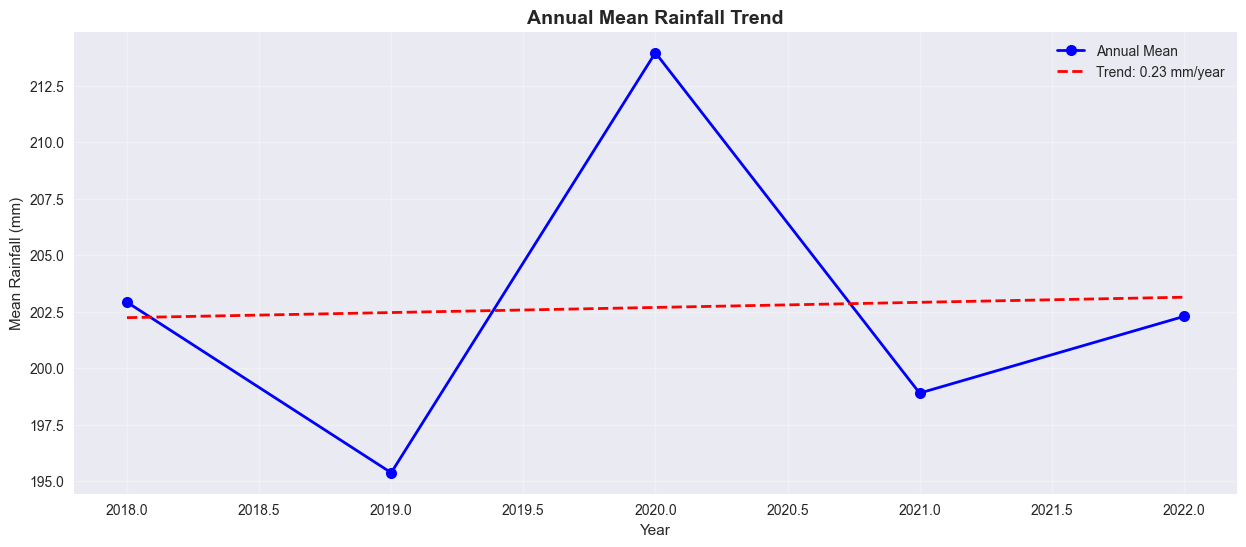

In [98]:
fig, (ax1) = plt.subplots(1, figsize=(15, 6))
ax1.plot(years, annual_means, marker='o', linewidth=2, markersize=8, 
         color='blue', label='Annual Mean')
ax1.plot(years, slope_mean * years + intercept_mean, 
         color='red', linestyle='--', linewidth=2, 
         label=f'Trend: {slope_mean:.2f} mm/year')
ax1.set_title('Annual Mean Rainfall Trend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Rainfall (mm)')
ax1.legend()
ax1.grid(True, alpha=0.3)

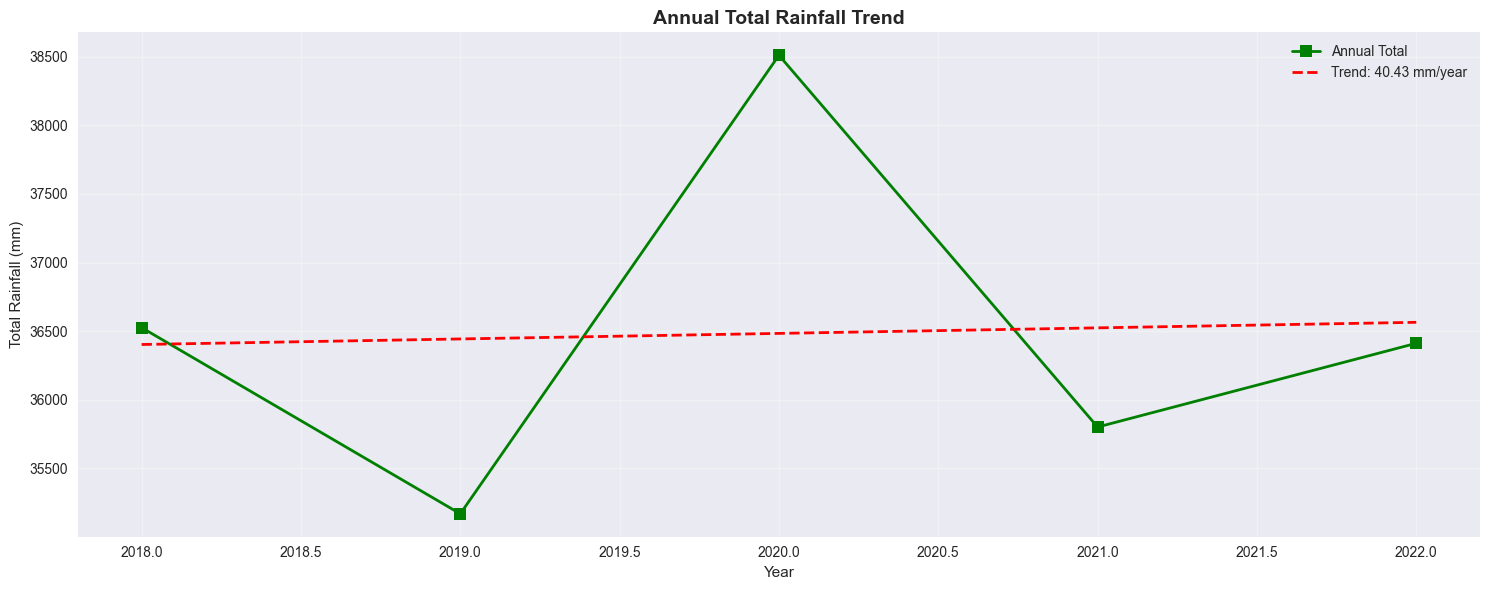

In [99]:
fig, (ax2) = plt.subplots(1, figsize=(15, 6))
ax2.plot(years, annual_totals, marker='s', linewidth=2, markersize=8, 
         color='green', label='Annual Total')
ax2.plot(years, slope_total * years + intercept_total, 
         color='red', linestyle='--', linewidth=2, 
         label=f'Trend: {slope_total:.2f} mm/year')
ax2.set_title('Annual Total Rainfall Trend', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Total Rainfall (mm)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Monthly Pattern Analysis (Mean and Standard deviations)

In [100]:
monthly_avg = df.groupby('month')['rainfall_mm'].mean().round(2)
monthly_std = df.groupby('month')['rainfall_mm'].std().round(2)

#### Avarage monthly rainfall

In [102]:
print("Average rainfall by month:")
for month, avg in monthly_avg.items():
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 
                   5: 'May', 6: 'June', 7: 'July', 8: 'August', 
                   9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    print(f"  {month_names[month]}: {avg:.2f} mm")

Average rainfall by month:
  January: 200.42 mm
  February: 209.19 mm
  March: 171.39 mm
  April: 224.62 mm
  May: 185.39 mm
  June: 194.25 mm
  July: 227.90 mm
  August: 219.63 mm
  September: 201.23 mm
  October: 219.28 mm
  November: 172.56 mm
  December: 206.39 mm


#### Find the wettest and driest months

In [103]:
wettest_month = monthly_avg.idxmax()
driest_month = monthly_avg.idxmin()

In [104]:
print(f"\nWettest month: {month_names[wettest_month]} ({monthly_avg[wettest_month]:.2f} mm)")
print(f"Driest month: {month_names[driest_month]} ({monthly_avg[driest_month]:.2f} mm)")
print(f"Seasonal variation: {monthly_avg.max() - monthly_avg.min():.2f} mm")


Wettest month: July (227.90 mm)
Driest month: March (171.39 mm)
Seasonal variation: 56.51 mm


#### Monthly Avarage rainfall visualization

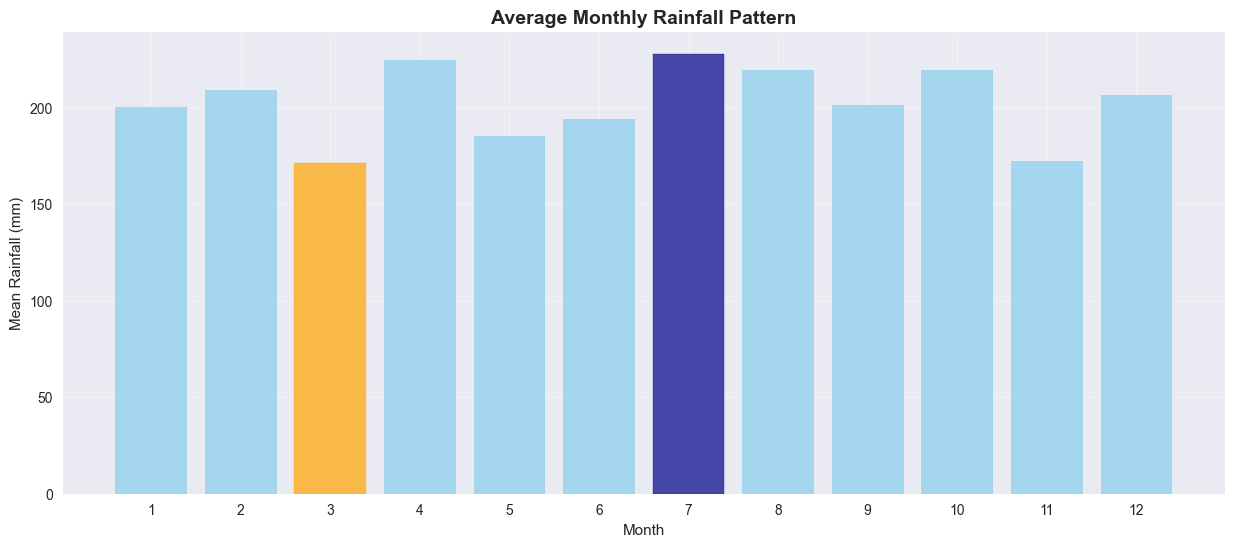

In [115]:
fig, (Avarage_rainfall) = plt.subplots(1, figsize=(15, 6))
bars = Avarage_rainfall.bar(monthly_avg.index, monthly_avg.values, color='skyblue', alpha=0.7)
Avarage_rainfall.set_title('Average Monthly Rainfall Pattern', fontsize=14, fontweight='bold')
Avarage_rainfall.set_xlabel('Month')
Avarage_rainfall.set_ylabel('Mean Rainfall (mm)')
Avarage_rainfall.set_xticks(range(1, 13))
Avarage_rainfall.grid(True, alpha=0.3)
bars[wettest_month-1].set_color('darkblue')
bars[driest_month-1].set_color('orange')

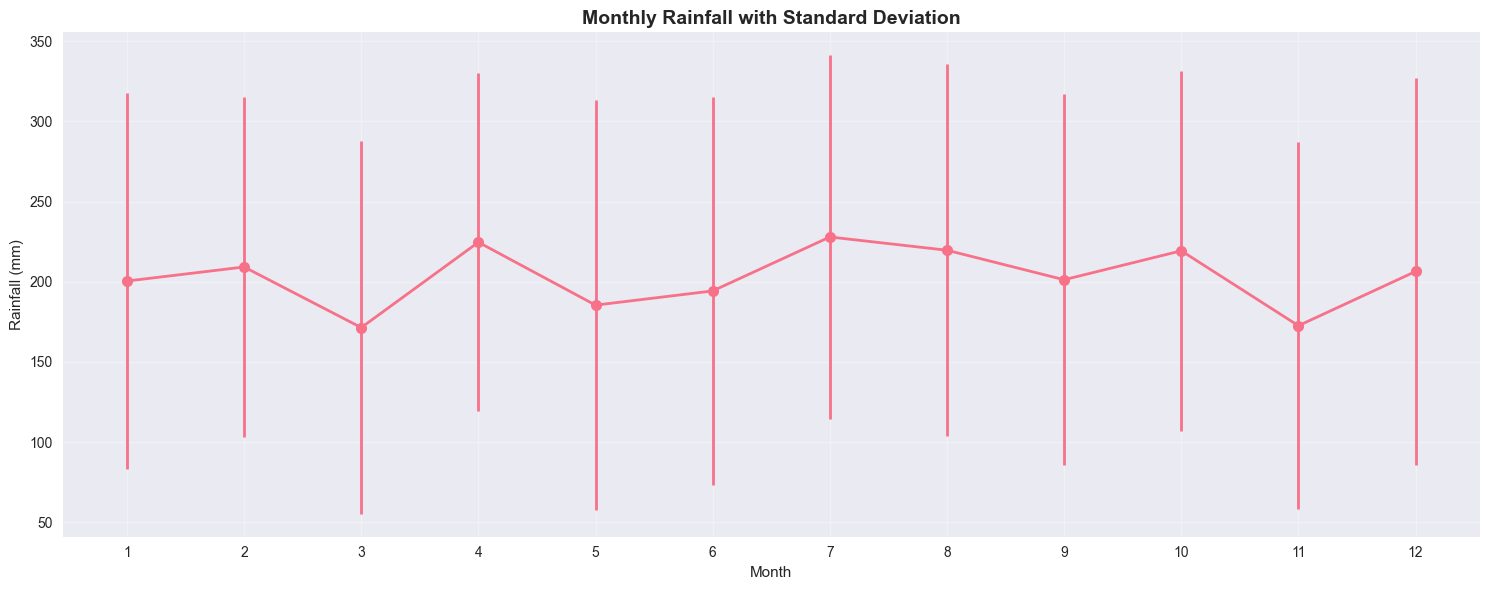

In [118]:
fig, (Avarage_rainfall) = plt.subplots(1, figsize=(15, 6))
Avarage_rainfall.errorbar(monthly_avg.index, monthly_avg.values, yerr=monthly_std.values,
             marker='o', linewidth=2, markersize=8, capsize=5)
Avarage_rainfall.set_title('Monthly Rainfall with Standard Deviation', fontsize=14, fontweight='bold')
Avarage_rainfall.set_xlabel('Month')
Avarage_rainfall.set_ylabel('Rainfall (mm)')
Avarage_rainfall.set_xticks(range(1, 13))
Avarage_rainfall.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### Analysis by country

In [119]:
country_stats = df.groupby('country')['rainfall_mm'].agg([
    'mean', 'std', 'min', 'max', 'count'
]).round(2)

In [120]:
print(" RAINFALL ANALYSIS BY COUNTRY")
print(country_stats)

 RAINFALL ANALYSIS BY COUNTRY
                 mean     std    min     max  count
country                                            
Benin          188.77  115.58   9.34  398.77    180
Côte dIvoire  218.15  119.31   7.52  399.18    180
Ethiopia       200.43  113.38  10.75  399.89    180
Kenya          201.80  121.45   9.28  397.22    180
Malawi         204.28  111.64   6.83  396.03    180


In [122]:
country_yearly = df.groupby(['country', 'year'])['rainfall_mm'].mean().unstack()
print(country_yearly.round(2))

year             2018    2019    2020    2021    2022
country                                              
Benin          180.22  184.10  183.66  197.02  198.86
Côte dIvoire  260.19  196.68  219.65  227.34  186.88
Ethiopia       201.63  190.50  224.47  189.94  195.63
Kenya          191.25  182.41  218.57  195.77  220.97
Malawi         181.31  223.21  223.39  184.40  209.10


In [123]:
country_trends = {}
for country in df['country'].unique():
    country_data = df[df['country'] == country].groupby('year')['rainfall_mm'].mean()
    if len(country_data) > 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            country_data.index, country_data.values
        )
        country_trends[country] = {
            'slope': slope,
            'r_squared': r_value**2,
            'p_value': p_value,
            'avg_rainfall': country_data.mean(),
            'trend': 'Increasing' if slope > 0 else 'Decreasing',
            'significant': p_value < 0.05
        }


In [124]:
print(f"\nCOUNTRY TREND ANALYSIS:")
for country, trend in country_trends.items():
    print(f"{country}:")
    print(f"  Average: {trend['avg_rainfall']:.2f} mm")
    print(f"  Slope: {trend['slope']:.2f} mm/year")
    print(f"  R-squared: {trend['r_squared']:.3f}")
    print(f"  Trend: {trend['trend']}")
    print(f"  Significant: {'Yes' if trend['significant'] else 'No'}")
    print()


COUNTRY TREND ANALYSIS:
Kenya:
  Average: 201.80 mm
  Slope: 7.28 mm/year
  R-squared: 0.452
  Trend: Increasing
  Significant: No

Ethiopia:
  Average: 200.43 mm
  Slope: -1.26 mm/year
  R-squared: 0.019
  Trend: Decreasing
  Significant: No

Malawi:
  Average: 204.28 mm
  Slope: 1.68 mm/year
  R-squared: 0.017
  Trend: Increasing
  Significant: No

Benin:
  Average: 188.77 mm
  Slope: 5.02 mm/year
  R-squared: 0.866
  Trend: Increasing
  Significant: Yes

Côte dIvoire:
  Average: 218.15 mm
  Slope: -11.60 mm/year
  R-squared: 0.408
  Trend: Decreasing
  Significant: No



#### Visualization by Country

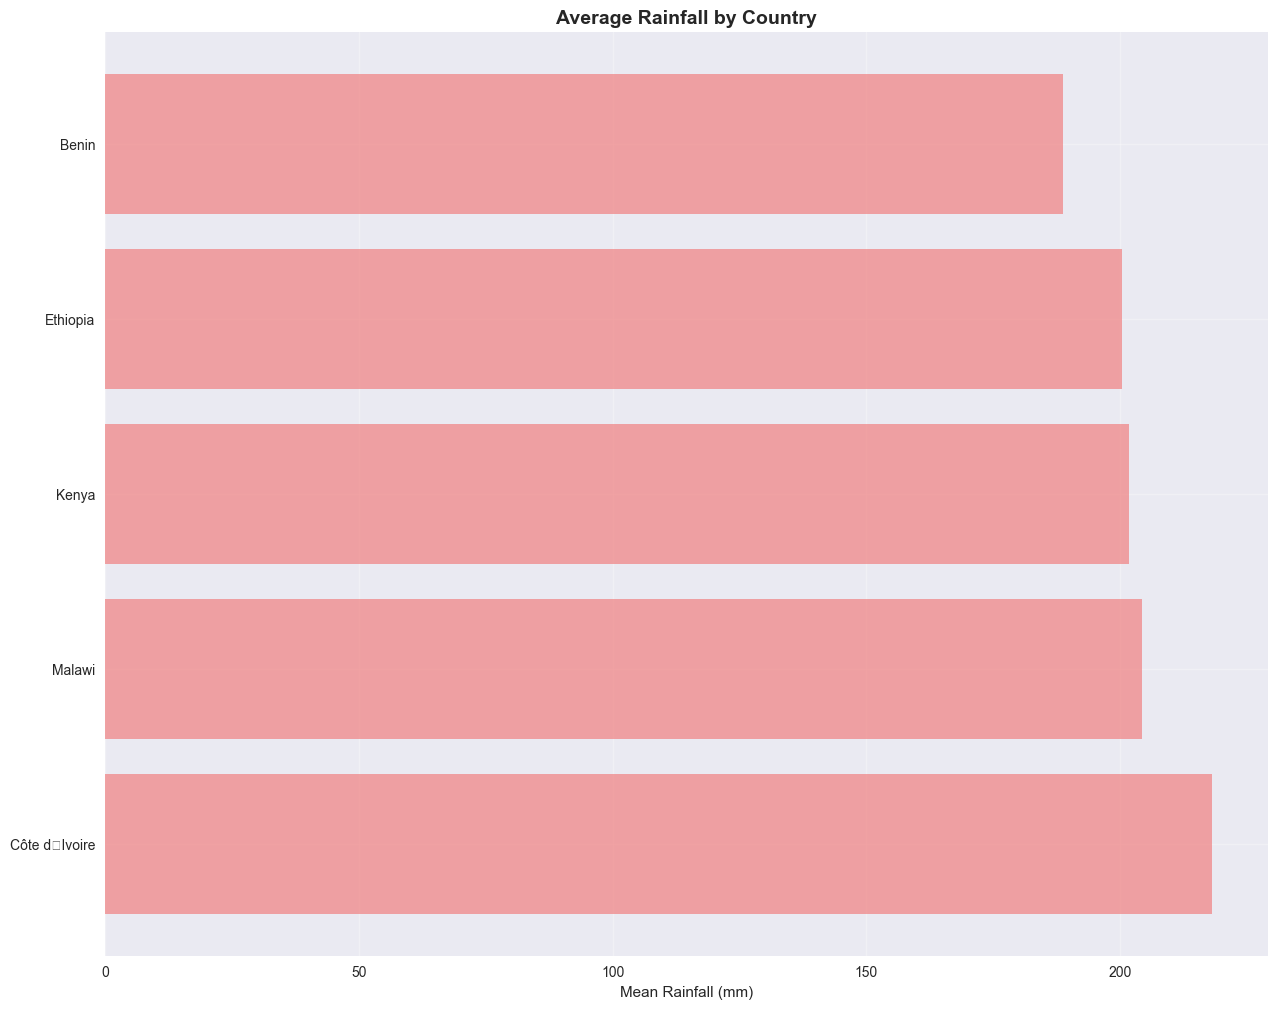

In [126]:
fig, (Avarage_rainfall) = plt.subplots(1, figsize=(15, 12))
country_avg = df.groupby('country')['rainfall_mm'].mean().sort_values(ascending=False)
Avarage_rainfall.barh(range(len(country_avg)), country_avg.values, color='lightcoral', alpha=0.7)
Avarage_rainfall.set_yticks(range(len(country_avg)))
Avarage_rainfall.set_yticklabels(country_avg.index)
Avarage_rainfall.set_title('Average Rainfall by Country', fontsize=14, fontweight='bold')
Avarage_rainfall.set_xlabel('Mean Rainfall (mm)')
Avarage_rainfall.grid(True, alpha=0.3)

#### Country trends over the 5 years in review

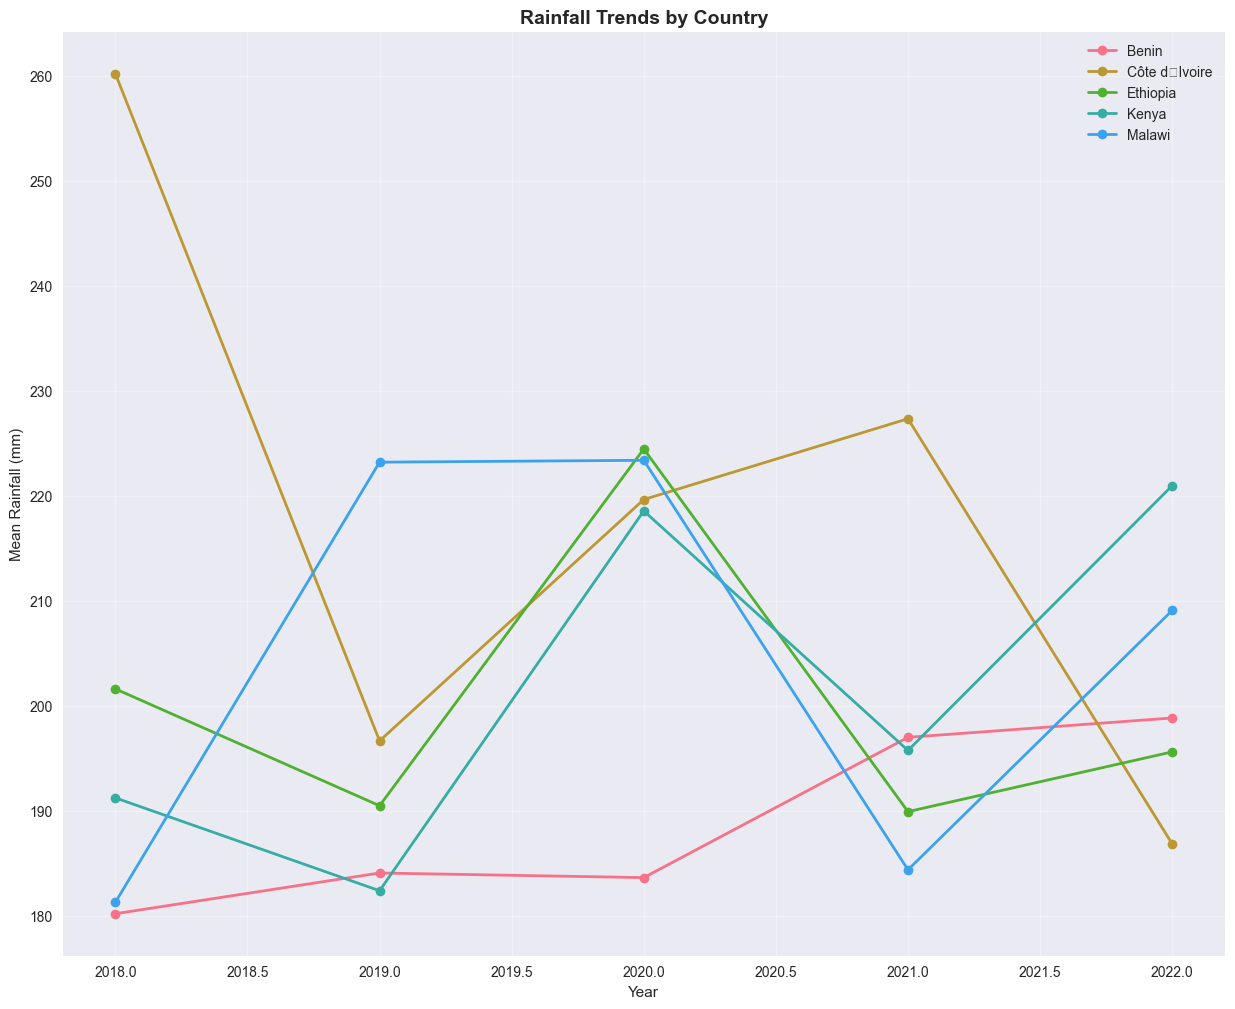

In [127]:
fig, (Avarage_rainfall) = plt.subplots(1, figsize=(15, 12))
for country in country_yearly.index:
    Avarage_rainfall.plot(country_yearly.columns, country_yearly.loc[country], 
            marker='o', label=country, linewidth=2)
Avarage_rainfall.set_title('Rainfall Trends by Country', fontsize=14, fontweight='bold')
Avarage_rainfall.set_xlabel('Year')
Avarage_rainfall.set_ylabel('Mean Rainfall (mm)')
Avarage_rainfall.legend()
Avarage_rainfall.grid(True, alpha=0.3)

#### Slope visualization by country

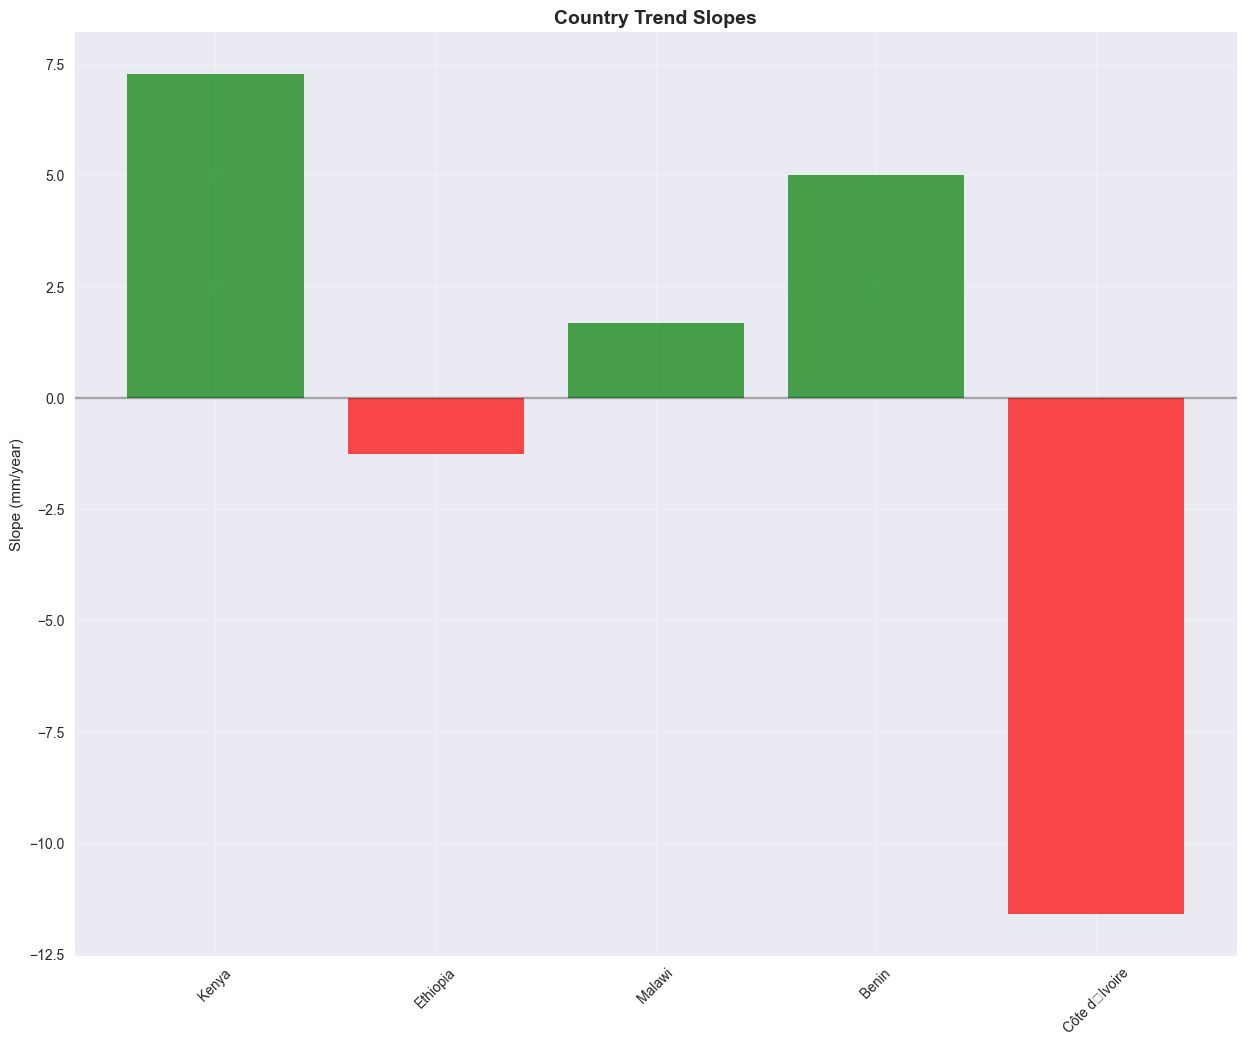

In [128]:
fig, (Avarage_rainfall) = plt.subplots(1, figsize=(15, 12))
if country_trends:
    countries = list(country_trends.keys())
    slopes = [country_trends[c]['slope'] for c in countries]
    bar_colors = ['green' if s > 0 else 'red' for s in slopes]
    
    Avarage_rainfall.bar(countries, slopes, color=bar_colors, alpha=0.7)
    Avarage_rainfall.set_title('Country Trend Slopes', fontsize=14, fontweight='bold')
    Avarage_rainfall.set_ylabel('Slope (mm/year)')
    Avarage_rainfall.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    Avarage_rainfall.tick_params(axis='x', rotation=45)
    Avarage_rainfall.grid(True, alpha=0.3)

#### Country rainfall distribution

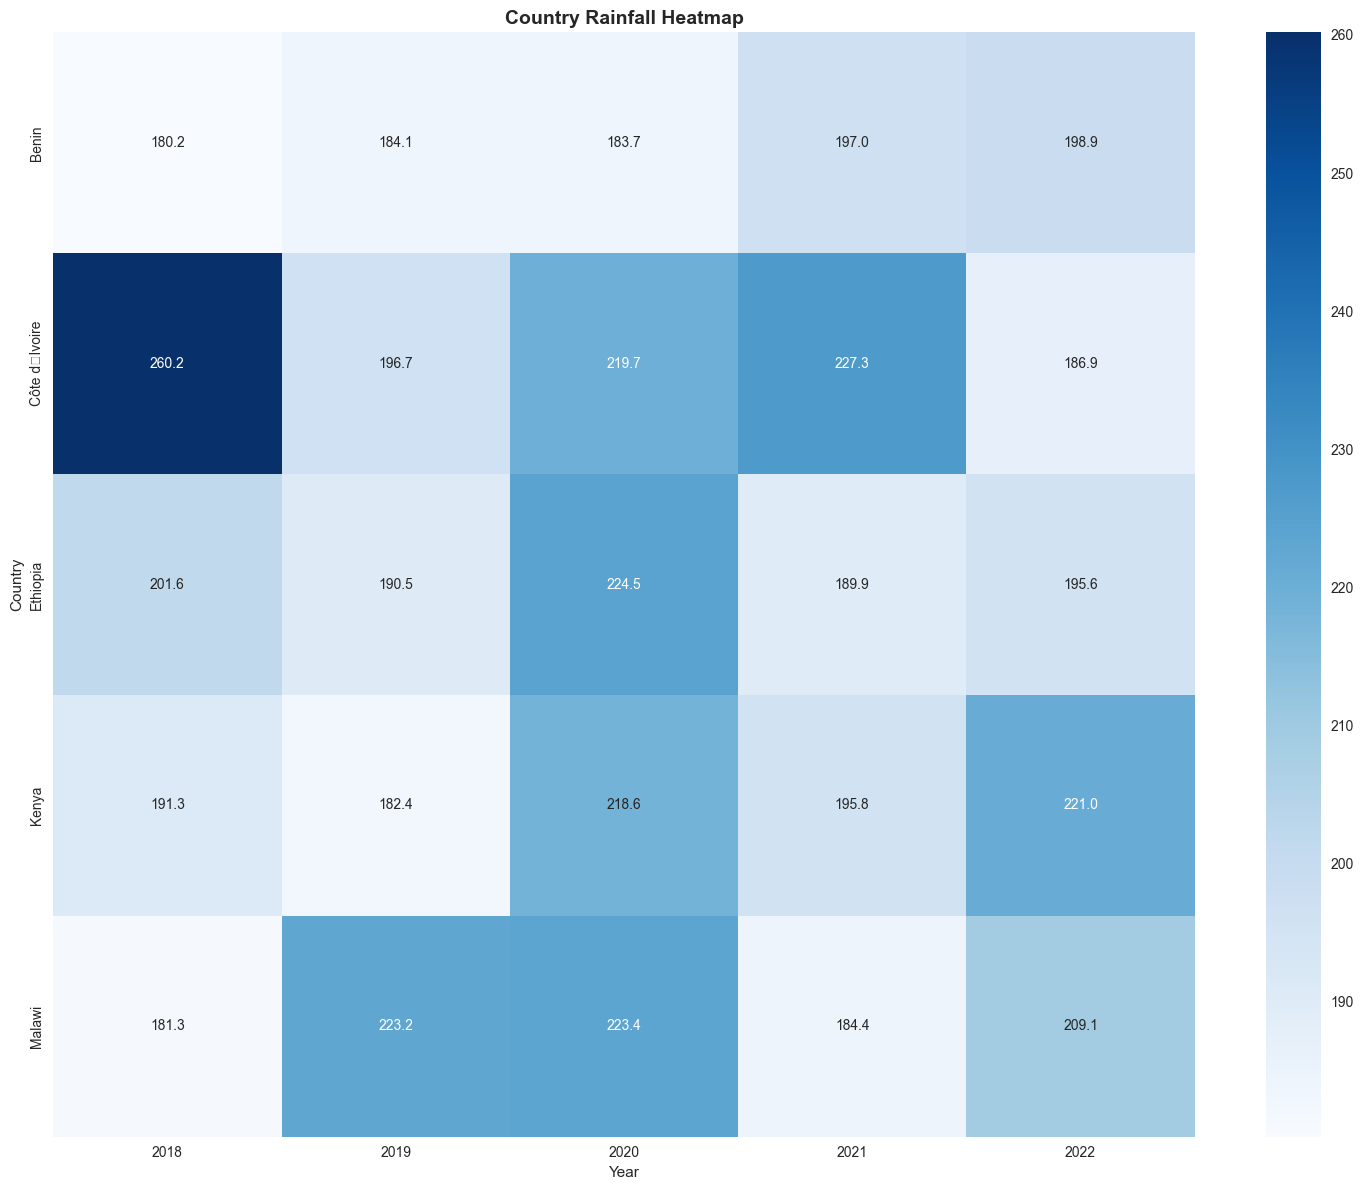

In [129]:
fig, (Avarage_rainfall) = plt.subplots(1, figsize=(15, 12))
df_country = df.pivot_table(values='rainfall_mm', index='country', columns='year', aggfunc='mean')
sns.heatmap(df_country, annot=True, cmap='Blues', ax=Avarage_rainfall, fmt='.1f')
Avarage_rainfall.set_title('Country Rainfall Heatmap', fontsize=14, fontweight='bold')
Avarage_rainfall.set_xlabel('Year')
Avarage_rainfall.set_ylabel('Country')

plt.tight_layout()
plt.show()

#### Analysis by Region

In [130]:
regional_stats = df.groupby('region')['rainfall_mm'].agg([
    'mean', 'std', 'min', 'max', 'count'
]).round(2)

In [131]:
print(regional_stats)

               mean     std    min     max  count
region                                           
Abidjan      212.30  122.45  12.06  399.18     60
Abomey       203.57  114.17  17.32  395.13     60
Addis Ababa  237.65  119.06  15.41  399.89     60
Blantyre     209.53  110.80  18.25  376.23     60
Bouaké       210.03  118.58  27.85  397.99     60
Cotonou      169.75  118.28  10.14  398.77     60
Hawassa      172.80  101.88  12.93  368.74     60
Kisumu       216.38  121.30   9.28  396.25     60
Korhogo      232.11  117.61   7.52  392.57     60
Lilongwe     189.43  115.45  25.47  396.03     60
Mekelle      190.85  110.30  10.75  392.11     60
Mombasa      200.49  131.73   9.48  397.22     60
Mzuzu        213.88  108.92   6.83  394.01     60
Nairobi      188.52  110.85  10.69  390.46     60
Parakou      192.99  113.56   9.34  393.84     60


In [132]:
regional_yearly = df.groupby(['region', 'year'])['rainfall_mm'].mean().unstack()

In [133]:
print(regional_yearly.round(2))

year           2018    2019    2020    2021    2022
region                                             
Abidjan      261.64  164.45  240.05  229.77  165.61
Abomey       190.13  145.47  209.79  261.40  211.07
Addis Ababa  239.88  211.13  240.63  238.94  257.68
Blantyre     190.08  217.77  220.36  220.10  199.38
Bouaké       241.35  199.30  207.35  221.65  180.50
Cotonou      181.96  164.21  169.05  153.79  179.76
Hawassa      133.30  190.83  192.40  155.95  191.53
Kisumu       189.78  184.51  247.88  227.05  232.69
Korhogo      277.58  226.29  211.57  230.62  214.51
Lilongwe     149.46  210.96  186.66  161.23  238.86
Mekelle      231.70  169.56  240.38  174.94  137.69
Mombasa      185.24  169.68  242.96  177.57  226.98
Mzuzu        204.39  240.91  263.15  171.89  189.05
Nairobi      198.74  193.05  164.88  182.68  203.25
Parakou      168.59  242.61  172.14  175.86  205.75


#### Regional trends Callculations

In [134]:
regional_trends = {}
for region in df['region'].unique():
    region_data = df[df['region'] == region].groupby('year')['rainfall_mm'].mean()
    if len(region_data) > 2:
        slope, intercept, r_value, p_value, std_err = stats.linregress(
            region_data.index, region_data.values
        )
        regional_trends[region] = {
            'slope': slope,
            'r_squared': r_value**2,
            'p_value': p_value,
            'avg_rainfall': region_data.mean(),
            'trend': 'Increasing' if slope > 0 else 'Decreasing',
            'significant': p_value < 0.05
        }

In [135]:
for region, trend in regional_trends.items():
    print(f"{region}:")
    print(f"  Average: {trend['avg_rainfall']:.2f} mm")
    print(f"  Slope: {trend['slope']:.2f} mm/year")
    print(f"  R-squared: {trend['r_squared']:.3f}")
    print(f"  Trend: {trend['trend']}")
    print(f"  Significant: {'Yes' if trend['significant'] else 'No'}")
    print()

Nairobi:
  Average: 188.52 mm
  Slope: -0.13 mm/year
  R-squared: 0.000
  Trend: Decreasing
  Significant: No

Kisumu:
  Average: 216.38 mm
  Slope: 12.84 mm/year
  R-squared: 0.532
  Trend: Increasing
  Significant: No

Mombasa:
  Average: 200.49 mm
  Slope: 9.14 mm/year
  R-squared: 0.198
  Trend: Increasing
  Significant: No

Addis Ababa:
  Average: 237.65 mm
  Slope: 6.34 mm/year
  R-squared: 0.359
  Trend: Increasing
  Significant: No

Mekelle:
  Average: 190.85 mm
  Slope: -18.26 mm/year
  R-squared: 0.436
  Trend: Decreasing
  Significant: No

Hawassa:
  Average: 172.80 mm
  Slope: 8.16 mm/year
  R-squared: 0.229
  Trend: Increasing
  Significant: No

Lilongwe:
  Average: 189.43 mm
  Slope: 12.91 mm/year
  R-squared: 0.314
  Trend: Increasing
  Significant: No

Blantyre:
  Average: 209.53 mm
  Slope: 2.09 mm/year
  R-squared: 0.056
  Trend: Increasing
  Significant: No

Mzuzu:
  Average: 213.88 mm
  Slope: -9.97 mm/year
  R-squared: 0.177
  Trend: Decreasing
  Significant: No

C

#### Visualization of rainfall by region

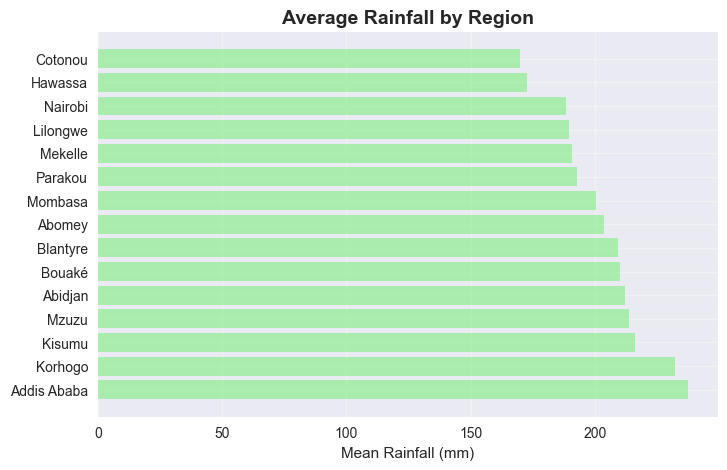

In [144]:
fig, (rainfall) = plt.subplots(1 , figsize=(8, 5))
regional_avg = df.groupby('region')['rainfall_mm'].mean().sort_values(ascending=False)
rainfall.barh(range(len(regional_avg)), regional_avg.values, color='lightgreen', alpha=0.7)
rainfall.set_yticks(range(len(regional_avg)))
rainfall.set_yticklabels(regional_avg.index)
rainfall.set_title('Average Rainfall by Region', fontsize=14, fontweight='bold')
rainfall.set_xlabel('Mean Rainfall (mm)')
rainfall.grid(True, alpha=0.3)

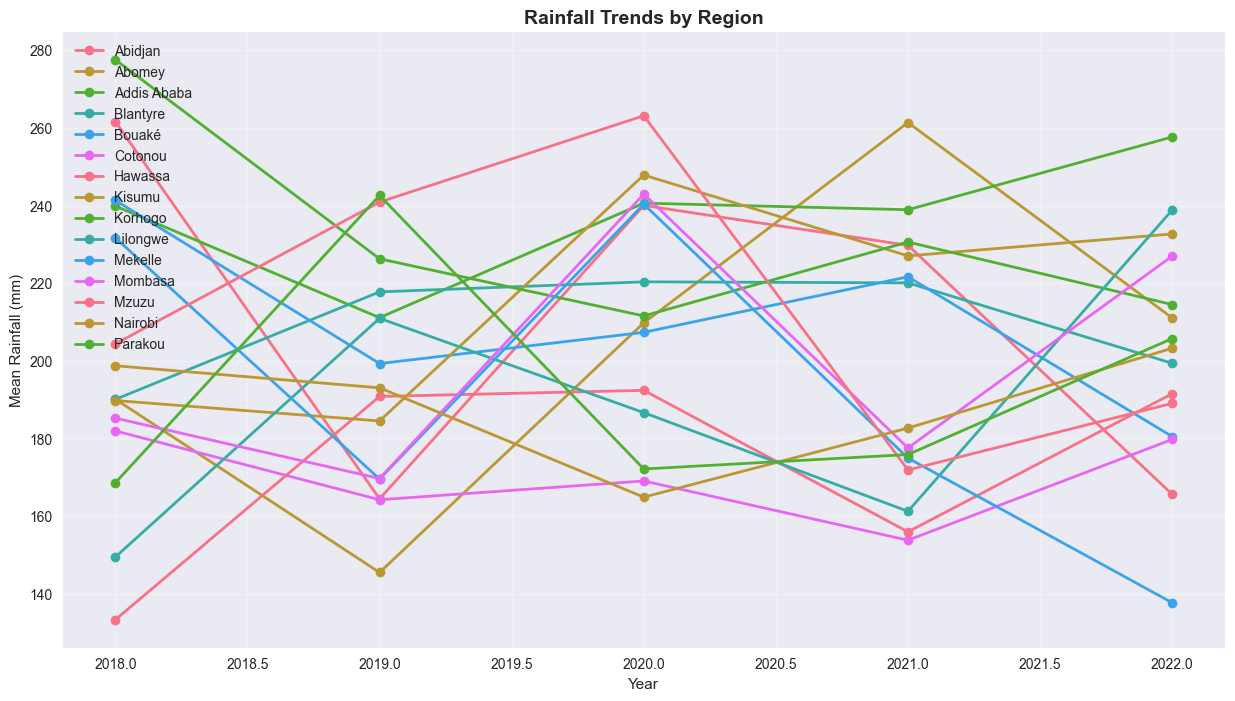

In [153]:
fig, (rainfall) = plt.subplots(1, figsize=(15, 8))
for region in regional_yearly.index:
    rainfall.plot(regional_yearly.columns, regional_yearly.loc[region], 
            marker='o', label=region, linewidth=2)
rainfall.set_title('Rainfall Trends by Region', fontsize=14, fontweight='bold')
rainfall.set_xlabel('Year')
rainfall.set_ylabel('Mean Rainfall (mm)')
rainfall.legend()
rainfall.grid(True, alpha=0.3)

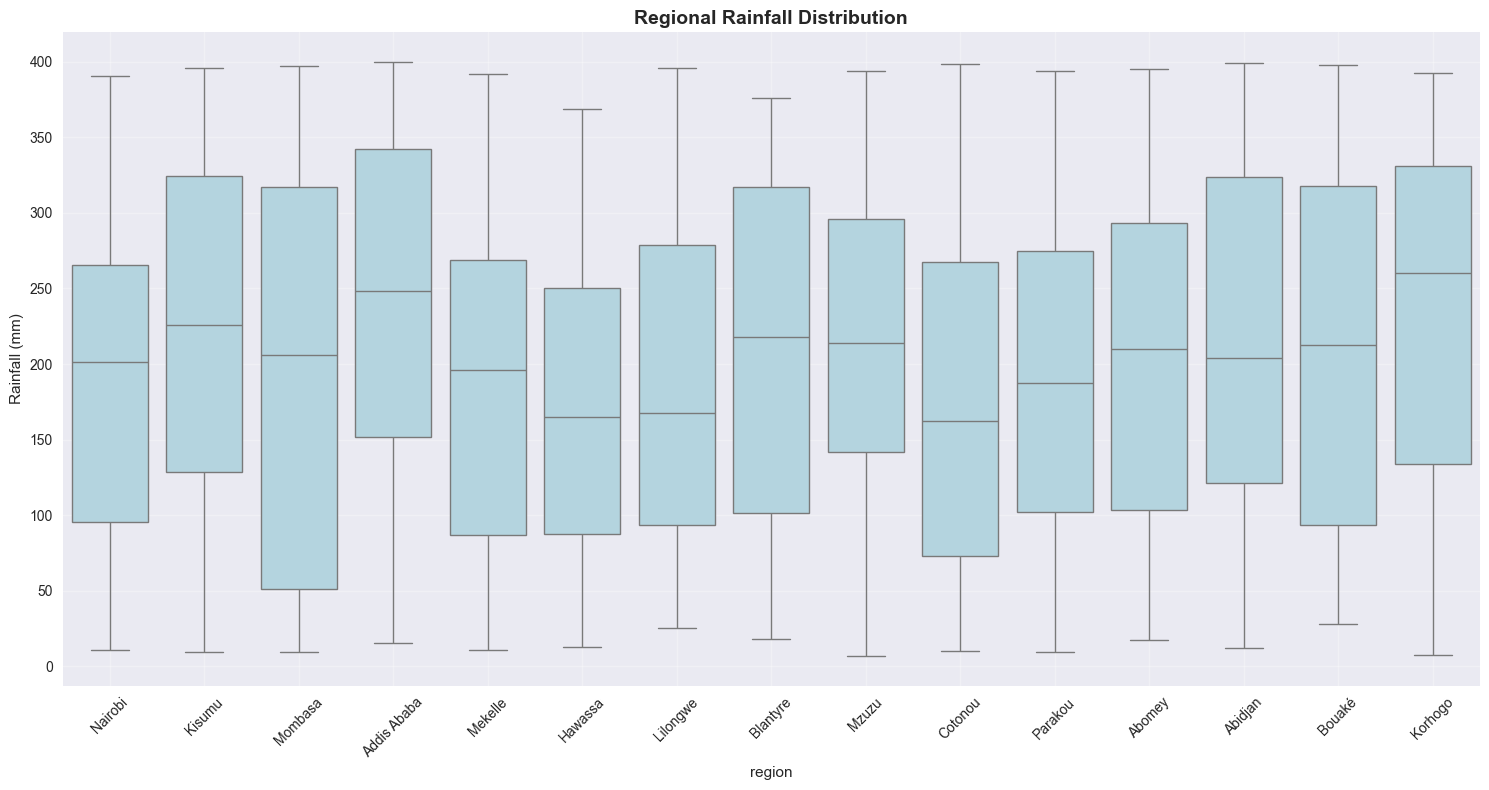

In [157]:

fig, (rainfall) = plt.subplots(1, figsize=(15, 8))
sns.boxplot(data=df, x='region', y='rainfall_mm', ax=rainfall,  color = 'lightblue')
rainfall.set_title('Regional Rainfall Distribution', fontsize=14, fontweight='bold')
rainfall.set_ylabel('Rainfall (mm)')
rainfall.tick_params(axis='x', rotation=45)
rainfall.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

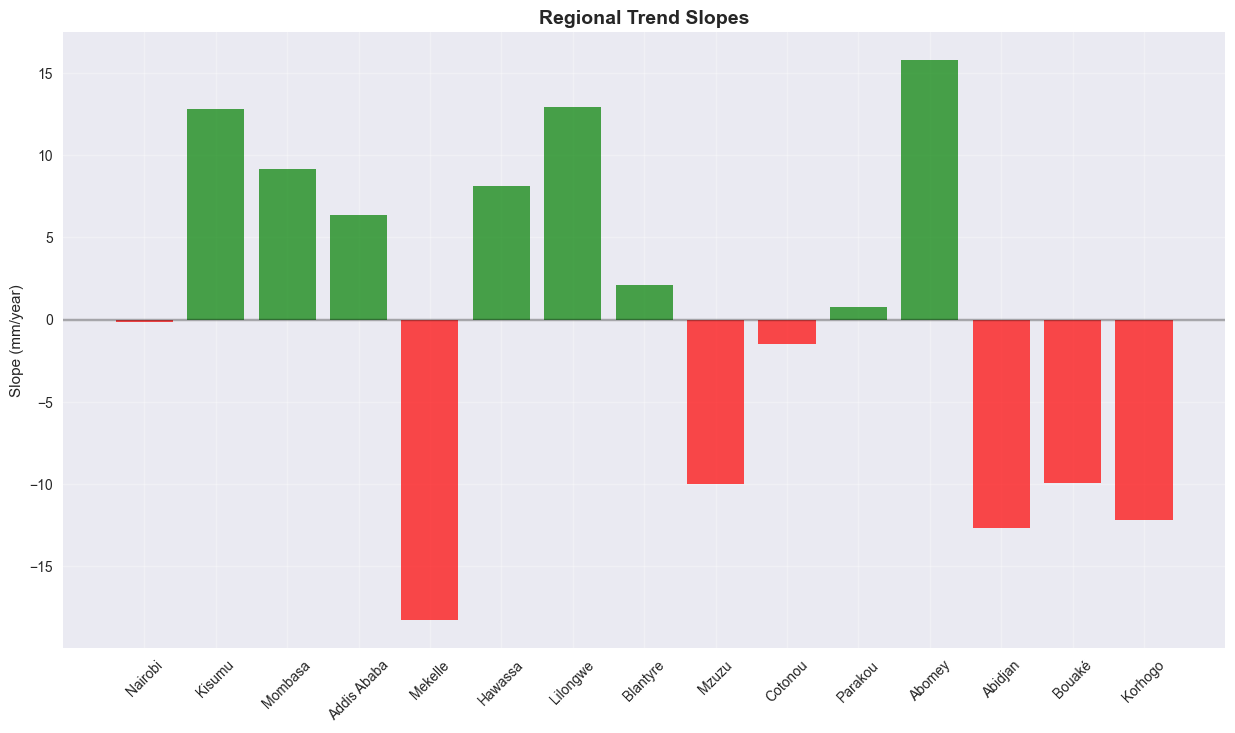

In [158]:
fig, (rainfall) = plt.subplots(1, figsize=(15, 8))
if regional_trends:
    regions = list(regional_trends.keys())
    slopes = [regional_trends[r]['slope'] for r in regions]
    bar_colors = ['green' if s > 0 else 'red' for s in slopes]
    
    rainfall.bar(regions, slopes, color=bar_colors, alpha=0.7)
    rainfall.set_title('Regional Trend Slopes', fontsize=14, fontweight='bold')
    rainfall.set_ylabel('Slope (mm/year)')
    rainfall.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    rainfall.tick_params(axis='x', rotation=45)
    rainfall.grid(True, alpha=0.3)